<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


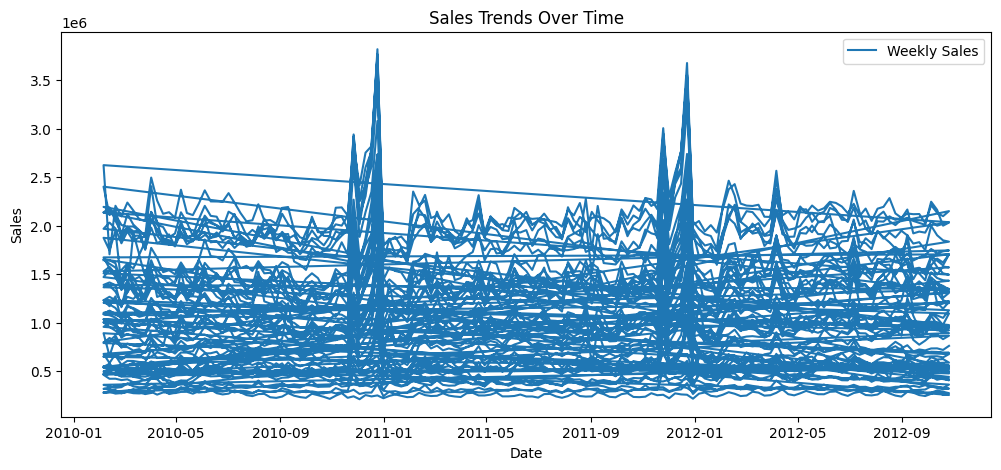

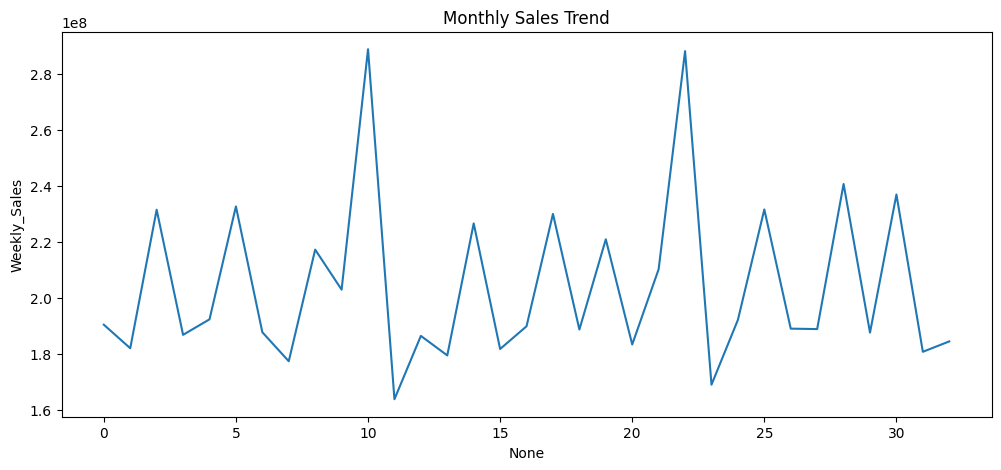

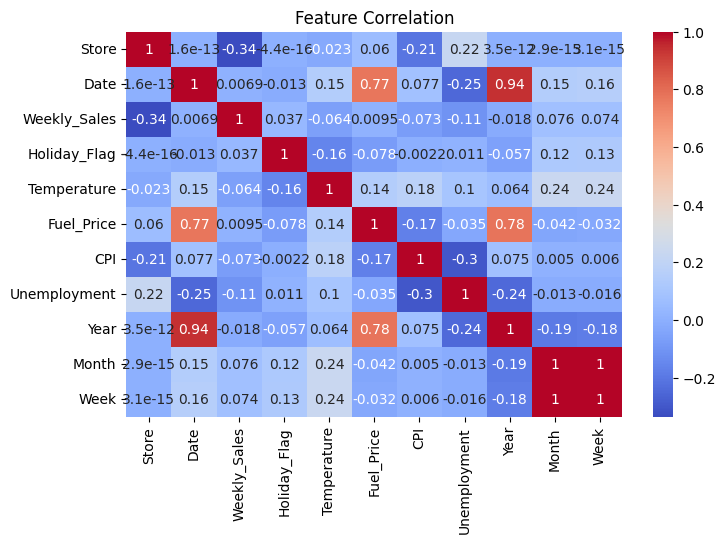

ADF Statistic: -4.624149498578306
p-value: 0.00011655869699901148
Data is stationary


<Figure size 1200x800 with 0 Axes>

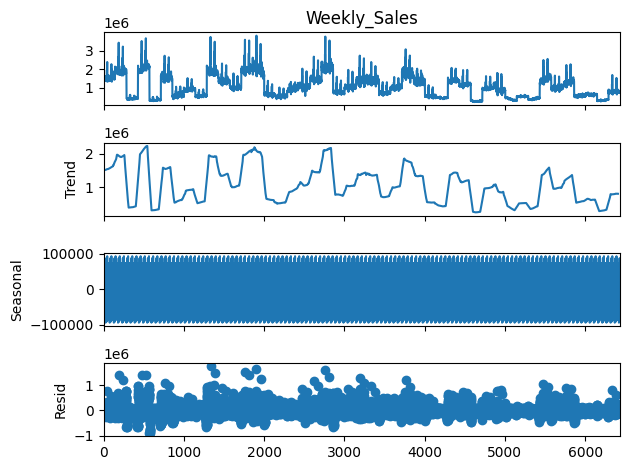

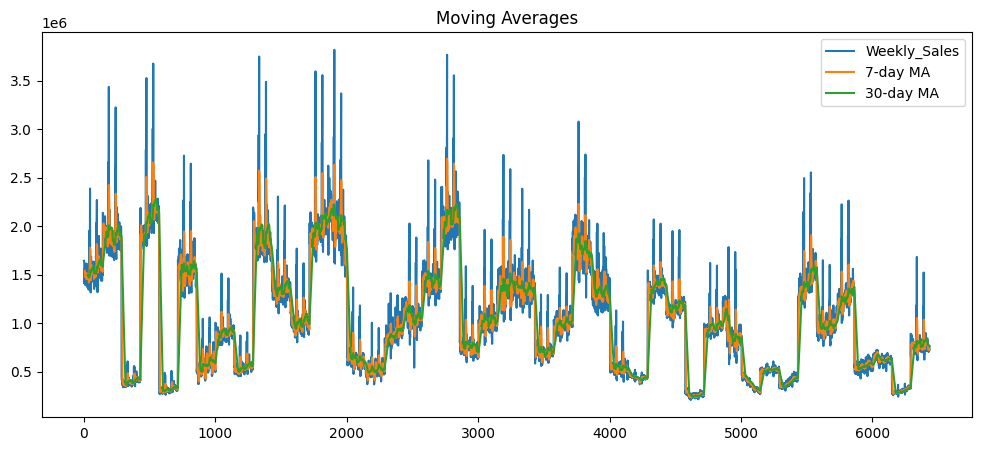

6435    752505.631145
6436    746684.569784
6437    740035.513415
6438    752786.655602
6439    743905.616097
6440    745981.225379
6441    744646.452769
6442    748945.607846
6443    744385.721113
6444    746855.488399
Name: predicted_mean, dtype: float64


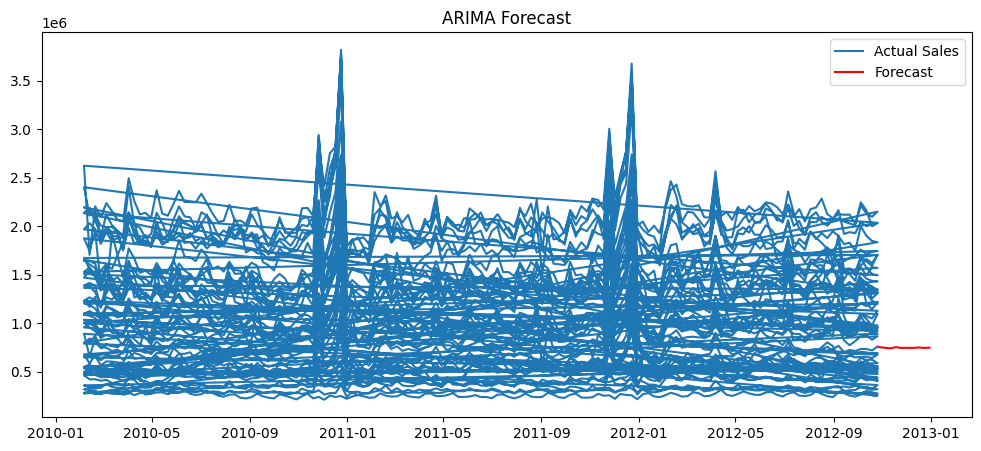

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphxa3nop1/uwnzgblg.json


          ds           y
0 2010-02-05  1643690.90
1 2010-02-12  1641957.44
2 2010-02-19  1611968.17
3 2010-02-26  1409727.59
4 2010-03-05  1554806.68


DEBUG:cmdstanpy:input tempfile: /tmp/tmphxa3nop1/kkfqawc6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80111', 'data', 'file=/tmp/tmphxa3nop1/uwnzgblg.json', 'init=/tmp/tmphxa3nop1/kkfqawc6.json', 'output', 'file=/tmp/tmphxa3nop1/prophet_modelhbqw4lwy/prophet_model-20250213103929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:39:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


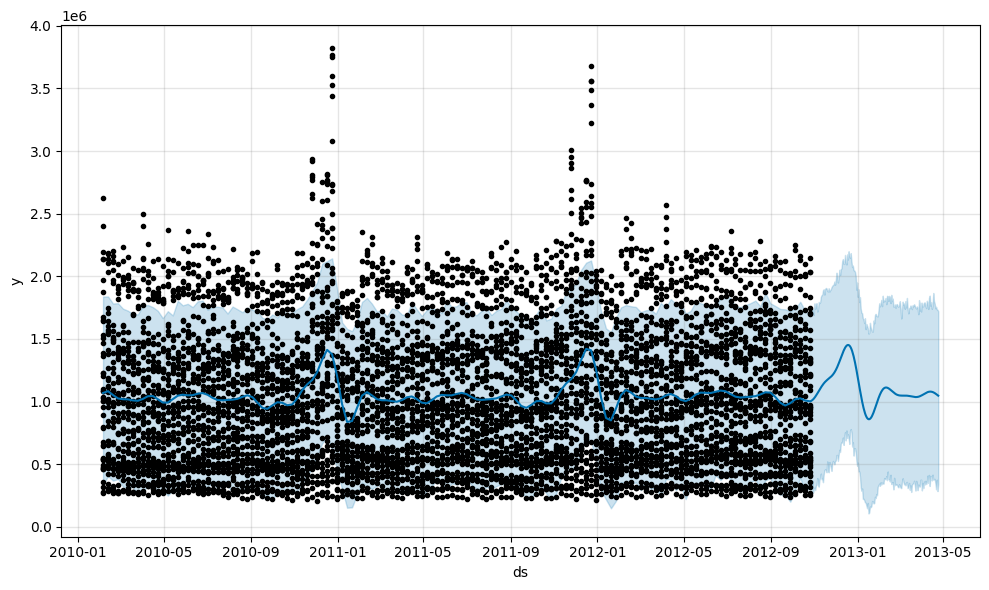

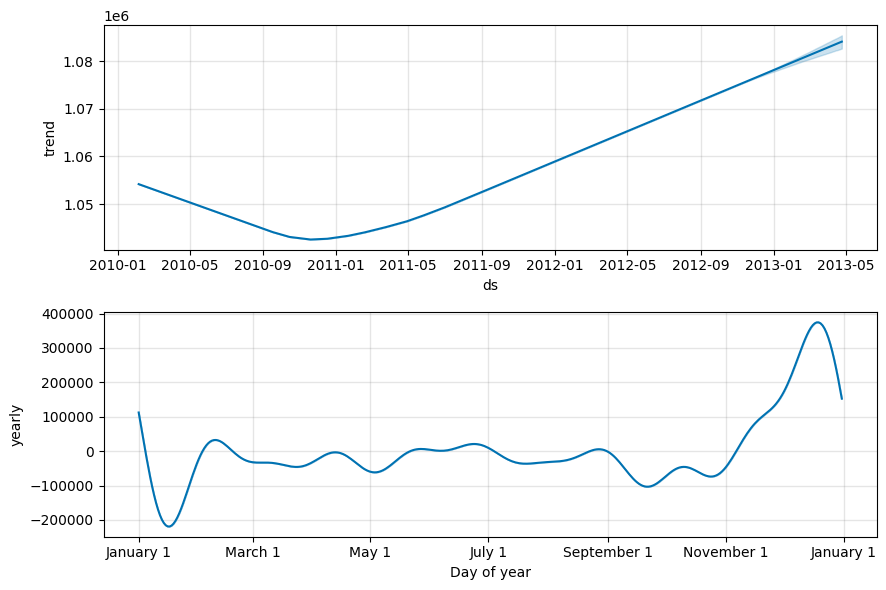

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


322/322 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0311 - val_loss: 0.0224
Epoch 2/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0255 - val_loss: 0.0223
Epoch 3/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0257 - val_loss: 0.0220
Epoch 4/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0251 - val_loss: 0.0220
Epoch 5/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0249 - val_loss: 0.0222
Epoch 6/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0257 - val_loss: 0.0219
Epoch 7/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0253 - val_loss: 0.0221
Epoch 8/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0248 - val_loss: 0.0219
Epoch 9/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0250 - val_loss: 0.0219
Epoch 10/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0240 - val_loss: 0.0219
Epoch 11/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0251 - val_loss: 0.0219
Epoch 12/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/ste

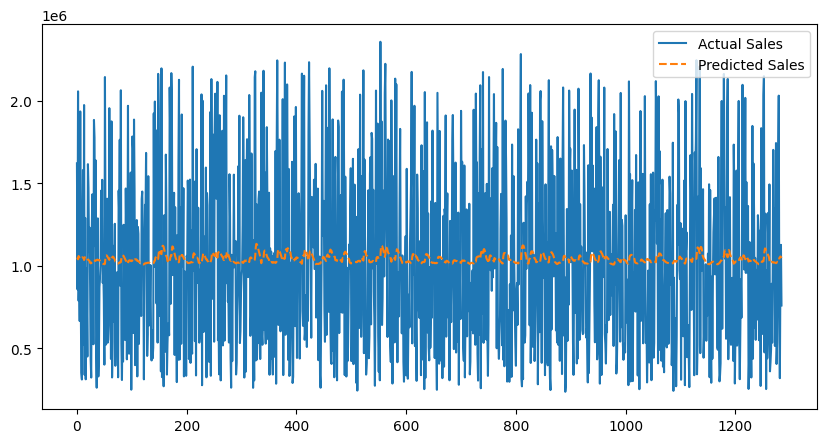

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install required libraries (if not installed)
!pip install pandas numpy matplotlib seaborn statsmodels pmdarima prophet --quiet

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load Dataset
df = pd.read_csv('/archive.zip')

# Show first 5 rows
df.head()
# Check data types and missing values
print(df.info())
print(df.isnull().sum())

# Convert Date column to datetime format (if exists)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Drop duplicates (if any)
df.drop_duplicates(inplace=True)

# Fill missing values (if necessary)
df.fillna(0, inplace=True)

# Check final data summary
df.describe()

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Weekly_Sales'], label="Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trends Over Time")
plt.legend()
plt.show()
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Monthly Sales Trend
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales['Weekly_Sales'])
plt.title("Monthly Sales Trend")
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller Test
result = adfuller(df['Weekly_Sales'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Weekly_Sales'], period=52, model='additive')
plt.figure(figsize=(12,8))
decomposition.plot()
plt.show()

df['7-day MA'] = df['Weekly_Sales'].rolling(window=7).mean()
df['30-day MA'] = df['Weekly_Sales'].rolling(window=30).mean()

df['Lag_1'] = df['Weekly_Sales'].shift(1)
df['Lag_7'] = df['Weekly_Sales'].shift(7)

df[['Weekly_Sales', '7-day MA', '30-day MA']].plot(figsize=(12,5))
plt.title("Moving Averages")
plt.show()

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA Model
model = ARIMA(df['Weekly_Sales'], order=(5,1,0))
model_fit = model.fit()

# Forecast Next 10 Weeks
forecast = model_fit.forecast(steps=10)
print(forecast)

# Plot Forecast
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Weekly_Sales'], label="Actual Sales")
plt.plot(pd.date_range(start=df['Date'].max(), periods=10, freq='W'), forecast, label="Forecast", color='red')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()

!pip install prophet  # Install Prophet (only needed once)

from prophet import Prophet
import pandas as pd

# Rename columns to match Prophet's requirements
df_prophet = df[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Verify the structure
print(df_prophet.head())

# Initialize the model
model = Prophet()

# Fit the model on the data
model.fit(df_prophet)

# Create future dates for prediction (next 6 months)
future = model.make_future_dataframe(periods=180, freq='D')

# Predict sales
forecast = model.predict(future)

# Show predictions
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

import matplotlib.pyplot as plt

# Plot the forecast
model.plot(forecast)
plt.show()

# Plot components (trend, seasonality)
model.plot_components(forecast)
plt.show()

# Sort data by date
df = df.sort_values(by='Date')

# Normalize the Weekly_Sales values
scaler = MinMaxScaler(feature_range=(0,1))
df['Weekly_Sales'] = scaler.fit_transform(df[['Weekly_Sales']])

# Convert DataFrame to NumPy array
data = df['Weekly_Sales'].values

# Create sequences for LSTM
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(data, seq_length)

# Reshape X for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Predict on test data
predictions = model.predict(X_test)

# Inverse transform to get actual values
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted sales
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label="Actual Sales")
plt.plot(predictions, label="Predicted Sales", linestyle="dashed")
plt.legend()
plt.show()

import pickle

# Save the trained model (replace `model` with your actual model variable)
with open("walmart_sales_model.pkl", "wb") as f:
    pickle.dump(model, f)

from google.colab import files
files.download("walmart_sales_model.pkl")






